# Unsupervised Learning and Preprocessing

Unsupervised learning subsumes all kinds of machine
learning where there is no known output, no teacher to instruct the learning algorithm. In unsupervised learning, the learning algorithm is just shown the input data
and asked to extract knowledge from this data.

Unsupervised transformations of a dataset are algorithms that create a new representation of the data which might be easier for humans or other machine learning algorithms to understand compared to the original representation of the data. A common
application of unsupervised transformations is dimensionality reduction, which takes
a high-dimensional representation of the data, consisting of many features, and finds
a new way to represent this data that summarizes the essential characteristics with
fewer features. A common application for dimensionality reduction is reduction to
two dimensions for visualization purposes.

Clustering algorithms, on the other hand, partition data into distinct groups of similar
items. Consider the example of uploading photos to a social media site. To allow you to organize your pictures, the site might want to group together pictures that show
the same person. However, the site doesn’t know which pictures show whom, and it
doesn’t know how many different people appear in your photo collection. A sensible
approach would be to extract all the faces and divide them into groups of faces that
look similar.


### Preprocessing and Scaling

In [45]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np

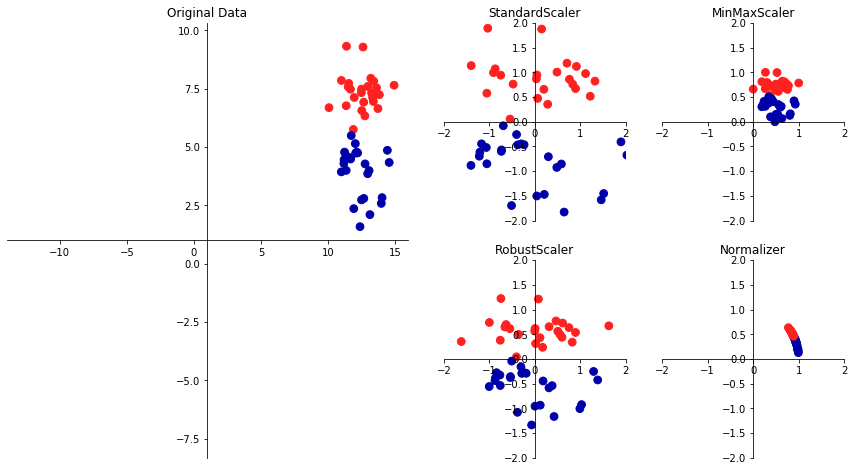

In [2]:
mglearn.plots.plot_scaling()

The StandardScaler in scikit-learn ensures that for each
feature the mean is 0 and the variance is 1, bringing all features to the same magnitude.

The RobustScaler works similarly to the StandardScaler in
that it ensures statistical properties for each feature that guarantee that they are on the
same scale. However, the RobustScaler uses the median and quartiles,1
instead of
mean and variance.

The MinMaxScaler, on the other hand, shifts the data such that all features are exactly
between 0 and 1.

The Normalizer does a very different kind of rescaling. It scales each data
point such that the feature vector has a Euclidean length of 1. In other words, it
projects a data point on the circle (or sphere, in the case of higher dimensions) with a
radius of 1.

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [4]:
cancer = load_breast_cancer()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   random_state = 1)

In [6]:
print(X_train.shape, X_test.shape)

(426, 30) (143, 30)


In [7]:
# first import the class that implements the preprocessing, and then instantiate it:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler()

In [9]:
# We then fit the scaler using the fit method, applied to the training data. For the MinMaxScaler,
# the fit method computes the minimum and maximum value of each feature on the training set.
# The scaler is only provided with the data (X_train) when fit is called, and y_train is not
# used:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

To apply the transformation that we just learned—that is, to actually scale the training
data—we use the transform method of the scaler. The transform method is used in
scikit-learn whenever a model returns a new representation of the data:

In [10]:
#Transform the data
X_train_scaled = scaler.transform(X_train)

In [11]:
# Print datasets properties before and after scaling
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(
X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
X_train_scaled.max(axis=0)))

transformed shape: (426, 30)
per-feature minimum before scaling:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [12]:
#To apply the SVM to the scaled data, we also need to transform the test set. This is
#again done by calling the transform method, this time on X_test:
X_test_scaled = scaler.transform(X_test)

#Print test data properties after scaling
print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
per-feature maximum after scaling:
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


Maybe somewhat surprisingly, you can see that for the test set, after scaling, the mini‐
mum and maximum are not 0 and 1. Some of the features are even outside the 0–1
range! The explanation is that the MinMaxScaler (and all the other scalers) always
applies exactly the same transformation to the training and the test set. This means
the transform method always subtracts the training set minimum and divides by the
training set range, which might be different from the minimum and range for the test
set.

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

Often, you want to fit a model on some dataset, and then transform it. This is a very
common task, which can often be computed more efficiently than by simply calling
fit and then transform. For this use case, all models that have a transform method
also have a fit_transform method. Here is an example using StandardScaler:

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
scaler = StandardScaler()
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)
# calling fit and transform in sequence (using method chaining)
X_scaled = scaler.fit(X).transform(X)
# same result, but more efficient computation
X_scaled_d = scaler.fit_transform(X)
                                  
#While fit_transform is not necessarily more efficient for all models, it is still good
#practice to use this method when trying to transform the training set.

### The Effect of Preprocessing on Supervised Learning

In [19]:
from sklearn.svm import SVC

In [21]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
random_state=0)

svm = SVC(C=100)
svm.fit(X_train,y_train)

print("test set accuracy: {:.2f}".format(svm.score(X_test,y_test)))

test set accuracy: 0.63


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [23]:
# Now, let’s scale the data using MinMaxScaler before fitting the SVC:
scaler = MinMaxScaler()
X_train_scaled =scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [24]:
# learning an SVM on the scaled training data
svm.fit(X_train_scaled,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [25]:
# scoring on the scaled test set
print("Scaled test set accuracy: {:.2f}".format(svm.score(X_test_scaled,y_test)))

Scaled test set accuracy: 0.86


You can also easily replace one preprocessing algorithm with another by changing the
class you use, as all of the preprocessing classes have the same interface, consisting of
the fit and transform methods:

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)
# scoring on the scaled test set
print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM test accuracy: 0.96


Transforming data using unsupervised learning can have
many motivations. The most common motivations are visualization, compressing the
data, and finding a representation that is more informative for further processing.

### Principal component Analysis (PCA)

Principal component analysis is a method that rotates the dataset in a way such that
the rotated features are statistically uncorrelated. This rotation is often followed by
selecting only a subset of the new features, according to how important they are for
explaining the data.

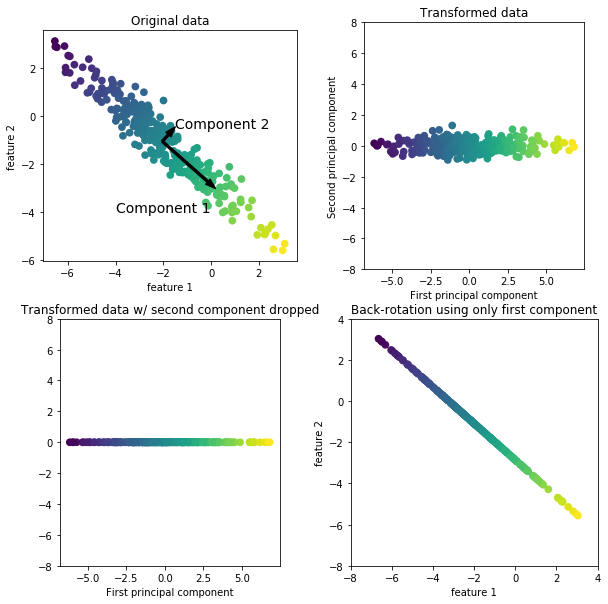

In [28]:
mglearn.plots.plot_pca_illustration()

One of the most common applications of PCA is visualizing high-dimensional data‐
sets. Using PCA, we can capture the main interactions
and get a slightly more complete picture. We can find the first two principal compo‐
nents, and visualize the data in this new two-dimensional space with a single scatter
plot.

In [29]:
#Scale our data so that each feature has unit variance using StandardScaler

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(cancer.data)

Learning the PCA transformation and applying it is as simple as applying a preprocessing transformation. We instantiate the PCA object, find the principal components
by calling the fit method, and then apply the rotation and dimensionality reduction
by calling transform. By default, PCA only rotates (and shifts) the data, but keeps all
principal components. To reduce the dimensionality of the data, we need to specify
how many components we want to keep when creating the PCA object:

from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=2)

#fit PCA model to breast cancer data

pca.fit(X_scaled)

#transform data onto the first two principal components

X_pca = pca.transform(X_scaled)
print("original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Text(0, 0.5, 'Second principal component')

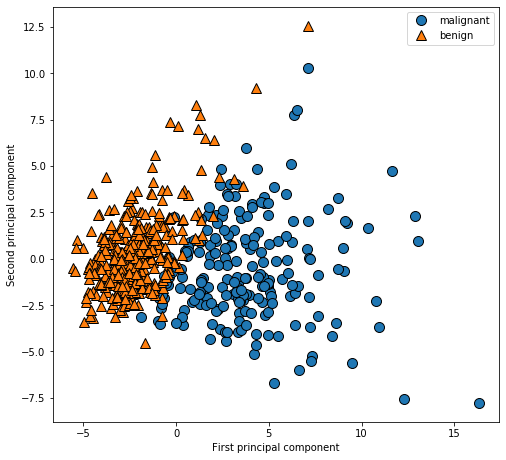

In [33]:
# We can now plot the first two principal components

# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [34]:
# The principal components themselves are stored in the
# components_ attribute of the PCA object during fitting:
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 30)


In [35]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'Principal components')

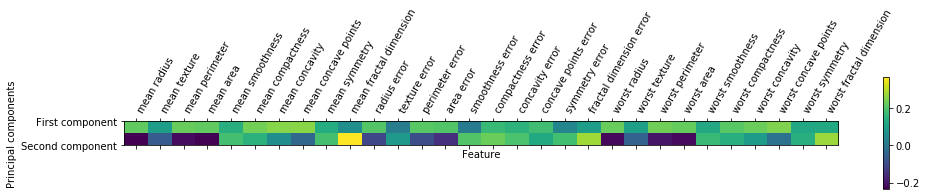

In [36]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

### Eigenfaces for feature extraction

Another application of PCA that we mentioned earlier is feature extraction. The idea
behind feature extraction is that it is possible to find a representation of your data
that is better suited to analysis than the raw representation you were given. A great
example of an application where feature extraction is helpful is with images. Images
are made up of pixels, usually stored as red, green, and blue (RGB) intensities.
Objects in images are usually made up of thousands of pixels, and only together are
they meaningful.

In [39]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape= people.images[0].shape

fix, axes = plt.subplots(2, 5, figsize=(15, 8),
                        subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

OSError: cannot identify image file '/Users/raulguzman/scikit_learn_data/lfw_home/lfw_funneled/Gloria_Macapagal_Arroyo/.DS_Store'

### Non-Negative Matrix Factorization (NMF)

Non-negative matrix factorization is another unsupervised learning algorithm that
aims to extract useful features. It works similarly to PCA and can also be used for
dimensionality reduction. As in PCA, we are trying to write each data point as a
weighted sum of some components, as illustrated in Figure 3-10. But whereas in PCA
we wanted components that were orthogonal and that explained as much variance of

the data as possible, in NMF, we want the components and the coefficients to be non-
negative; that is, we want both the components and the coefficients to be greater than

or equal to zero. Consequently, this method can only be applied to data where each
feature is non-negative, as a non-negative sum of non-negative components cannot
become negative.

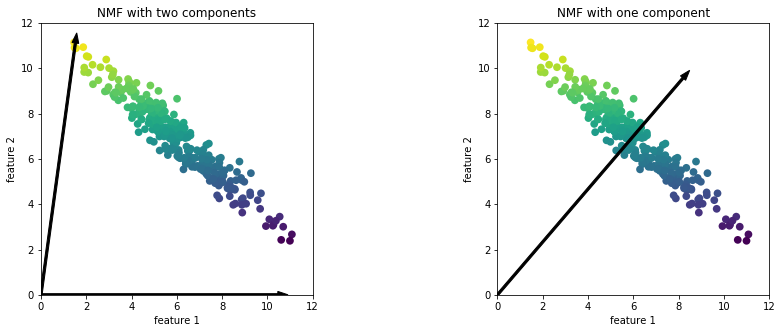

In [40]:
mglearn.plots.plot_nmf_illustration()

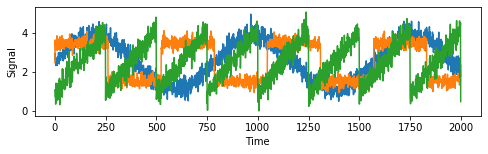

In [48]:
#Let’s say we are interested in a signal that is a combination of three different sources
S = mglearn.datasets.make_signals()
plt.figure(figsize=(8, 2))
plt.plot(S, '-')
plt.xlabel("Time")
plt.ylabel("Signal")
from sklearn.decomposition import NMF

Unfortunately we cannot observe the original signals, but only an additive mixture of
all three of them. We want to recover the decomposition of the mixed signal into the
original components. We assume that we have many different ways to observe the
mixture (say 100 measurement devices), each of which provides us with a series of
measurements:

In [46]:
# mix data into a 100-dimensional state
A = np.random.RandomState(0).uniform(size=(100,3))
X = np.dot(S,A.T)
print("Shape of measurements: {}".format(X.shape))

Shape of measurements: (2000, 100)


In [49]:
# We can use NMF to recover the three signals:
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print("Recovered signal shape: {}".format(S_.shape))

Recovered signal shape: (2000, 3)


In [50]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)

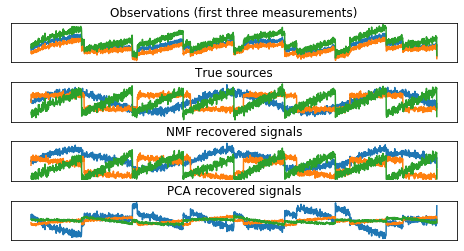

In [51]:
models = [X, S, S_, H]
names = ['Observations (first three measurements)',
        'True sources',
        'NMF recovered signals',
        'PCA recovered signals']
fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5},
                        subplot_kw={'xticks': (), 'yticks': ()})
for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

The figure includes 3 of the 100 measurements from X for reference. As you can see,
NMF did a reasonable job of discovering the original sources, while PCA failed and
used the first component to explain the majority of the variation in the data. Keep in
mind that the components produced by NMF have no natural ordering. In

### Manifold Learning with t-SNE

In [52]:
from sklearn.datasets import load_digits
digits = load_digits()


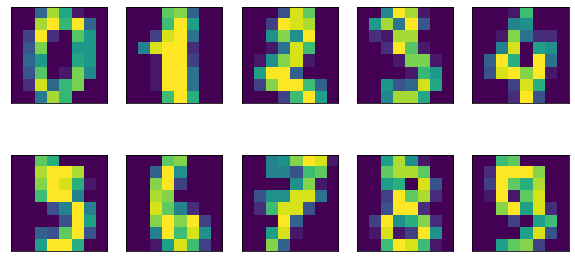

In [54]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                        subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(),digits.images):
    ax.imshow(img)

Text(0, 0.5, 'Second principal component')

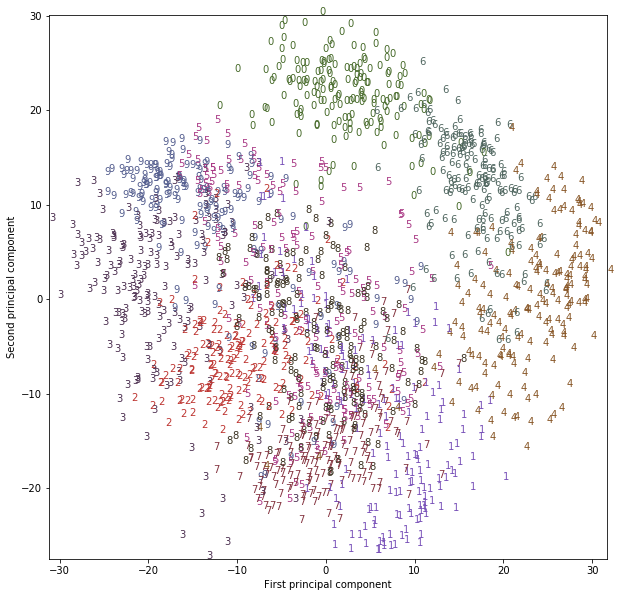

In [69]:
# Let’s use PCA to visualize the data reduced to two dimensions.
pca = PCA(n_components=2).fit(digits.data)
# Transform the digits onto the first two principal components
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
"#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10,10))
plt.xlim(digits_pca[:,0].min(),digits_pca[:,0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    plt.text(digits_pca[i,0],digits_pca[i,1],str(digits.target[i]),
            color =colors[digits.target[i]])
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [71]:
# Let’s apply t-SNE to the same dataset, and compare the results.
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
digits_tsne = tsne.fit_transform(digits.data)

Text(0.5, 0, 't-SNE feature 1')

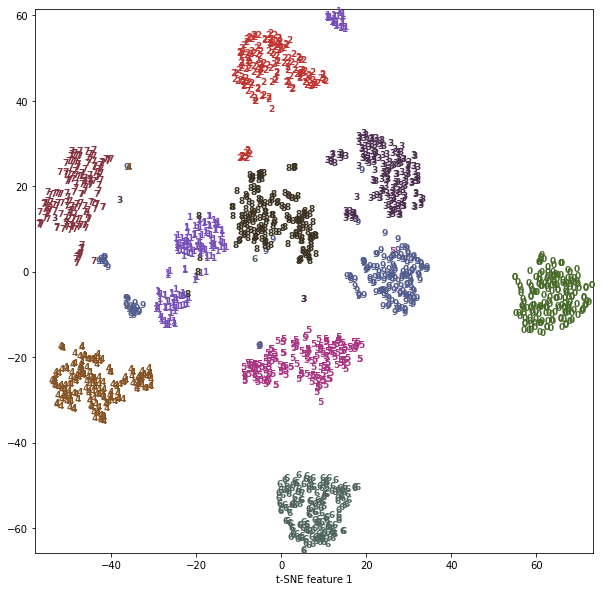

In [72]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
            color = colors[digits.target[i]],
            fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.xlabel("t-SNE feature 1")

# Clustering

As we described earlier, clustering is the task of partitioning the dataset into groups,
called clusters. The goal is to split up the data in such a way that points within a single
cluster are very similar and points in different clusters are different. Similarly to clas‐
sification algorithms, clustering algorithms assign (or predict) a number to each data
point, indicating which cluster a particular point belongs to.

### k-Means Clustering
k-means clustering is one of the simplest and most commonly used clustering algo‐
rithms. It tries to find cluster centers that are representative of certain regions of the
data. The algorithm alternates between two steps: assigning each data point to the
closest cluster center, and then setting each cluster center as the mean of the data
points that are assigned to it.

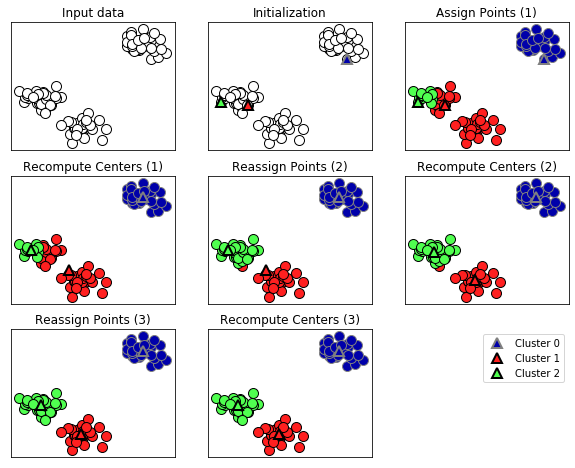

In [73]:
mglearn.plots.plot_kmeans_algorithm()

In [75]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [76]:
X, y = make_blobs(random_state=1)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [77]:
#During the algorithm, each training data point in X is assigned a cluster label. You can
#find these labels in the kmeans.labels_ attribute:
print("Cluster membership:\n {}".format(kmeans.labels_))

Cluster membership:
 [1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [79]:
print(kmeans.predict(X_test))

[0 0 2 0 2 0 0 1 2 1 2 1 1 1 0 0 0 0 0 1 0 2 0 1 2]


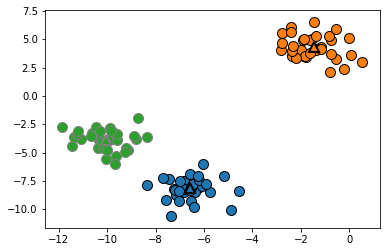

In [80]:
#The cluster centers are stored in the cluster_centers_ attribute
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
markers='^', markeredgewidth=2)

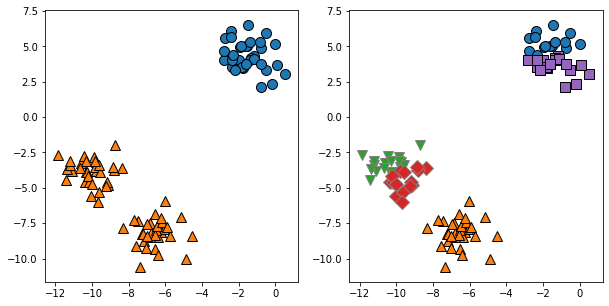

In [81]:
# We can also use more or fewer cluster centers
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# using two cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])
# using five cluster centers:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

### Vector quantization, or seeing k-means as decomposition
Even though k-means is a clustering algorithm, there are interesting parallels between
k-means and the decomposition methods like PCA and NMF that we discussed earlier. You might remember that PCA tries to find directions of maximum variance in
the data, while NMF tries to find additive components, which often correspond to
“extremes” or “parts” of the data. Both methods tried to express the
data points as a sum over some components. k-means, on the other hand, tries to represent each data point using a cluster center. You can think of that as each point being
represented using only a single component, which is given by the cluster center. This
view of k-means as a decomposition method, where each point is represented using a
single component, is called vector quantization.

In [22]:
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt 

In [4]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)


In [13]:
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [14]:
y_pred = kmeans.predict(X)
y_pred

array([9, 2, 5, 4, 2, 7, 9, 6, 9, 6, 1, 0, 2, 6, 1, 9, 3, 0, 3, 1, 7, 6,
       8, 6, 8, 5, 2, 7, 5, 8, 9, 8, 6, 5, 3, 7, 0, 9, 4, 5, 0, 1, 3, 5,
       2, 8, 9, 1, 5, 6, 1, 0, 7, 4, 6, 3, 3, 6, 3, 8, 0, 4, 2, 9, 6, 4,
       8, 2, 8, 4, 0, 4, 0, 5, 6, 4, 5, 9, 3, 0, 7, 8, 0, 7, 5, 8, 9, 8,
       0, 7, 3, 9, 7, 1, 7, 2, 2, 0, 4, 5, 6, 7, 8, 9, 4, 5, 4, 1, 2, 3,
       1, 8, 8, 4, 9, 2, 3, 7, 0, 9, 9, 1, 5, 8, 5, 1, 9, 5, 6, 7, 9, 1,
       4, 0, 6, 2, 6, 4, 7, 9, 5, 5, 3, 8, 1, 9, 5, 6, 3, 5, 0, 2, 9, 3,
       0, 8, 6, 0, 3, 3, 5, 6, 3, 2, 0, 2, 3, 0, 2, 6, 3, 4, 4, 1, 5, 6,
       7, 1, 1, 3, 2, 4, 7, 2, 7, 3, 8, 6, 4, 1, 4, 3, 9, 9, 5, 1, 7, 5,
       8, 2], dtype=int32)

Cluster membership:
[9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


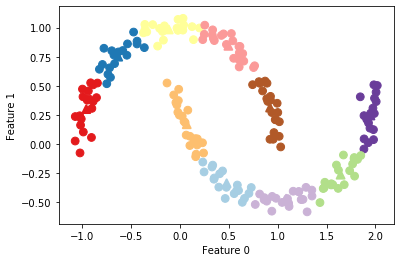

In [15]:
plt.scatter(X[:,0], X[:,1], c=y_pred, s =60, cmap= "Paired")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s = 60,
           marker = "^", c = range(kmeans.n_clusters), linewidths=2, cmap= "Paired")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
print("Cluster membership:\n{}".format(y_pred))

Using this 10-dimensional representation, it would now be possible to separate the two half-moon shapes using a linear model, which would not have been possible using the original two features. It is
also possible to get an even more expressive representation of the data by using the
distances to each of the cluster centers as features. This can be accomplished using
the transform method of kmeans:

In [19]:
distance_features = kmeans.transform(X)
print("Distance feature shape: {}".format(distance_features.shape))
print("Distance features:\n{}".format(distance_features))

Distance feature shape: (200, 10)
Distance features:
[[0.9220768  1.46553151 1.13956805 ... 1.16559918 1.03852189 0.23340263]
 [1.14159679 2.51721597 0.1199124  ... 0.70700803 2.20414144 0.98271691]
 [0.78786246 0.77354687 1.74914157 ... 1.97061341 0.71561277 0.94399739]
 ...
 [0.44639122 1.10631579 1.48991975 ... 1.79125448 1.03195812 0.81205971]
 [1.38951924 0.79790385 1.98056306 ... 1.97788956 0.23892095 1.05774337]
 [1.14920754 2.4536383  0.04506731 ... 0.57163262 2.11331394 0.88166689]]


### Agglomerative Clustering

Agglomerative clustering refers to a collection of clustering algorithms that all build
upon the same principles: the algorithm starts by declaring each point its own cluster,
and then merges the two most similar clusters until some stopping criterion is satisfied. The stopping criterion implemented in scikit-learn is the number of clusters,
so similar clusters are merged until only the specified number of clusters are left.
There are several linkage criteria that specify how exactly the “most similar cluster” is
measured. This measure is always defined between two existing clusters.

In [20]:
import mglearn

/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


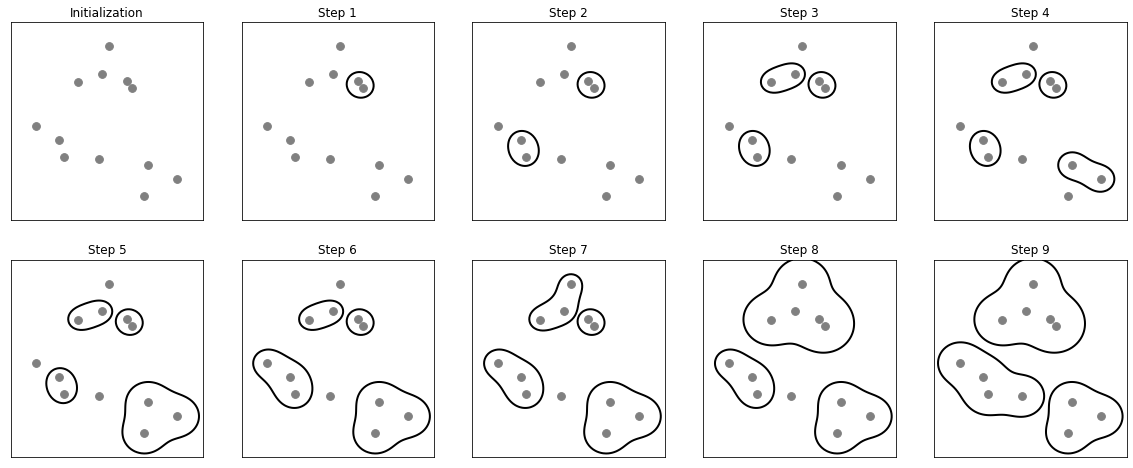

In [21]:
mglearn.plots.plot_agglomerative_algorithm()

In [27]:
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state=1)
X.shape

(100, 2)

In [24]:
agg = AgglomerativeClustering(n_clusters=3)
assigment= agg.fit_predict(X)

Text(0, 0.5, 'Feature 1')

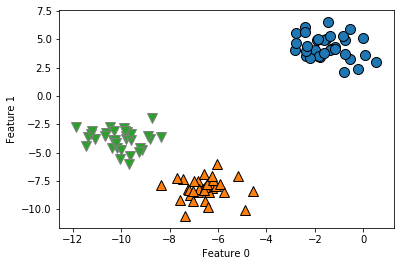

In [25]:
mglearn.discrete_scatter(X[:,0], X[:,1], assigment)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### Hierarchical clustering and dendrograms
Agglomerative clustering produces what is known as a hierarchical clustering. The
clustering proceeds iteratively, and every point makes a journey from being a single
point cluster to belonging to some final cluster. Each intermediate step provides a
clustering of the data (with a different number of clusters). It is sometimes helpful to
look at all possible clusterings jointly.

In [29]:
# import the dendogram function and the ward clustering function from SciPy
from scipy.cluster.hierarchy import dendrogram, ward

In [30]:
X, y = make_blobs(random_state=0, n_samples=12)
# Apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering
linkage_array = ward(X)

In [31]:
linkage_array

array([[ 1.        ,  4.        ,  0.3320945 ,  2.        ],
       [ 6.        ,  9.        ,  0.64580193,  2.        ],
       [ 2.        ,  8.        ,  0.92683223,  2.        ],
       [ 0.        , 11.        ,  1.1803787 ,  2.        ],
       [ 5.        , 15.        ,  1.30311575,  3.        ],
       [ 7.        , 13.        ,  1.4440339 ,  3.        ],
       [ 3.        , 14.        ,  1.60041812,  3.        ],
       [12.        , 18.        ,  2.07815795,  5.        ],
       [10.        , 17.        ,  2.15981886,  4.        ],
       [16.        , 20.        ,  6.55024854,  7.        ],
       [19.        , 21.        ,  7.92446877, 12.        ]])

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [10.0, 10.0, 32.5, 32.5],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [85.0, 85.0, 102.5, 102.5],
  [62.5, 62.5, 93.75, 93.75],
  [21.25, 21.25, 78.125, 78.125]],
 'dcoord': [[0.0, 0.3320945047164902, 0.3320945047164902, 0.0],
  [0.0, 0.9268322277319817, 0.9268322277319817, 0.0],
  [0.0, 1.6004181164464242, 1.6004181164464242, 0.9268322277319817],
  [0.3320945047164902,
   2.078157949404743,
   2.078157949404743,
   1.6004181164464242],
  [0.0, 1.1803786988620995, 1.1803786988620995, 0.0],
  [0.0, 1.3031157463723073, 1.3031157463723073, 1.1803786988620995],
  [0.0, 0.6458019336639491, 0.6458019336639491, 0.0],
  [0.0, 1.4440338959892802, 1.4440338959892802, 0.6458019336639491],
  [0.0, 2.1598188624745154, 2.1598188624745154, 1.4440338959892802],
  [1.3031157463723073,
   6.550248535823649,
   6.550248535823649,
   2.15

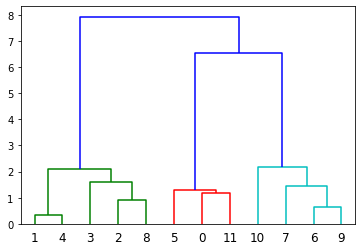

In [32]:
# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)

Text(0, 0.5, 'Cluster distance')

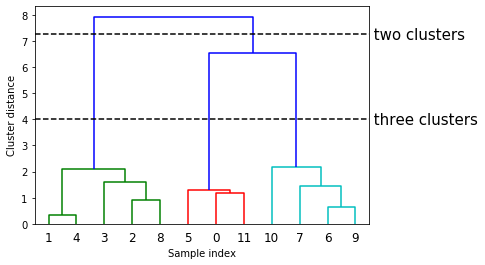

In [35]:
dendrogram(linkage_array)
#mark the cuts in the tree that sifnify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25,7.25],"--",c = "k")
ax. plot(bounds, [4,4],"--", c="k")

ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

## DBSCAN
The main benefits of DBSCAN

are that it does not require the user to set the number of clusters a priori, it can cap‐
ture clusters of complex shapes, and it can identify points that are not part of any
cluster. DBSCAN is somewhat slower than agglomerative clustering and k-means, but
still scales to relatively large datasets.

DBSCAN works by identifying points that are in “crowded” regions of the feature
space, where many data points are close together. These regions are referred to as
dense regions in feature space. The idea behind DBSCAN is that clusters form dense
regions of data, separated by regions that are relatively empty.

In [37]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("Cluster membership:\n{}".format(clusters))
#noise

Cluster membership:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


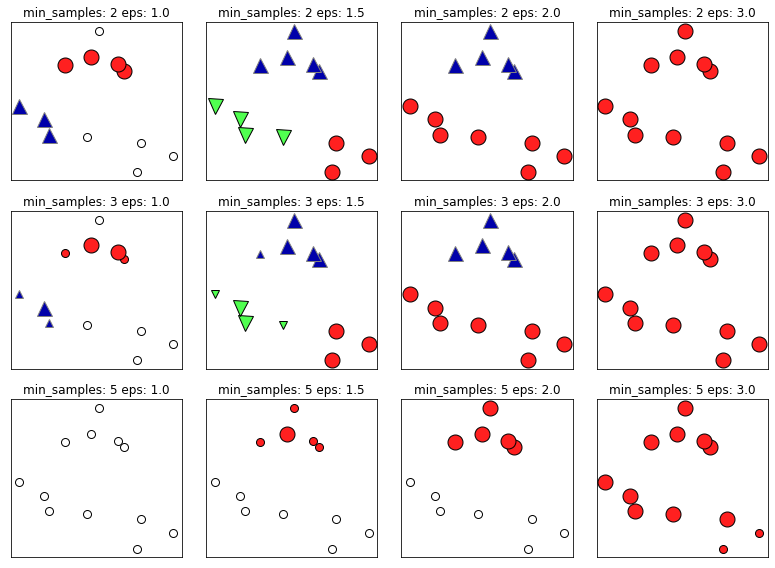

In [38]:
mglearn.plots.plot_dbscan()

In [39]:
X, y = make_moons(n_samples=200, noise=0.05,random_state=0)
#rescale the data to zero and unit variance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [40]:
scaler.fit(X)
X_scaled = scaler.transform(X)

Text(0, 0.5, 'Feature 1')

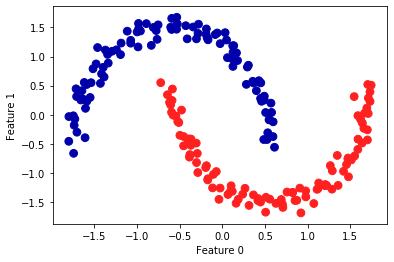

In [42]:
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
#plot the cluster assigments
plt.scatter(X_scaled[:,0],X_scaled[:,1], c = clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
           

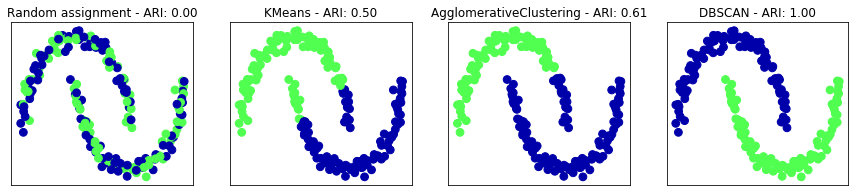

In [47]:
from sklearn.metrics.cluster import adjusted_rand_score
import numpy as np
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
fig, axes = plt.subplots(1, 4, figsize=(15, 3),
            subplot_kw={'xticks': (), 'yticks': ()})

# make a list of algorithms to use
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
DBSCAN()]

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(
adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
            cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
            adjusted_rand_score(y, clusters)))

### Evaluating clustering without ground truth

Although we have just shown one way to evaluate clustering algorithms, in practice,
there is a big problem with using measures like ARI. When applying clustering algo‐
rithms, there is usually no ground truth to which to compare the results. If we knew
the right clustering of the data, we could use this information to build a supervised
model like a classifier. Therefore, using metrics like ARI and NMI usually only helps
in developing algorithms, not in assessing success in an application.
There are scoring metrics for clustering that don’t require ground truth, like the silhouette coefficient. However, these often don’t work well in practice. The silhouette
score computes the compactness of a cluster, where higher is better, with a perfect
score of 1. While compact clusters are good, compactness doesn’t allow for complex
shapes.

In [48]:
from sklearn.metrics.cluster import silhouette_score

In [49]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

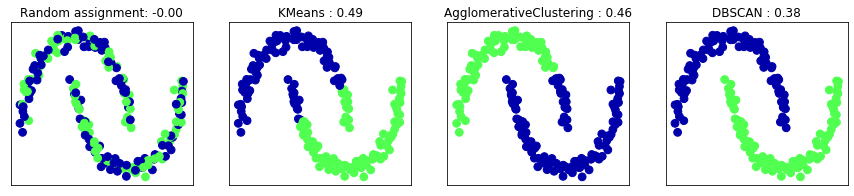

In [50]:
fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                subplot_kw={'xticks': (), 'yticks': ()})

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
        cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(
        silhouette_score(X_scaled, random_clusters)))

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
        clusters = algorithm.fit_predict(X_scaled)
        # plot the cluster assignments and cluster centers
        ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3,
                s=60)
        ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
                silhouette_score(X_scaled, clusters)))